In [66]:
# import iÅŸlemleri
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Verisetinin yÃ¼klenmesi
path = "/content/drive/MyDrive/Datasets/HouseData.csv"
df = pd.read_csv(path)

In [3]:
# Veri setinde herhangi bir deÄŸiÅŸiklik yapmadan Ã¶nce bir kopyasÄ±nÄ± oluÅŸturmakta fayda var.
df_copy = df.copy()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Veri setinin incelenmesi**

In [5]:
df.head(11)

Unnamed: 0 district         price  \
0            0   adalar   3,100,000TL   
1            1   adalar   1,600,000TL   
2            2   adalar  18,500,000TL   
3            3   adalar   9,500,000TL   
4            4   adalar  25,000,000TL   
5            5   adalar   7,000,000TL   
6            6   adalar   3,250,000TL   
7            7   adalar   2,850,000TL   
8            8   adalar   8,350,000TL   
9            9   adalar  10,800,000TL   
10          10   adalar   2,200,000TL   

                                              address    AdUpdateDate  \
0   ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...   24 Åžubat 2022   
1   ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...    02 Mart 2022   
2   ['Anasayfa', 'SatÄ±lÄ±k MÃ¼stakil Ev', 'Ä°stanbul ...   11 Åžubat 2022   
3   ['Anasayfa', 'SatÄ±lÄ±k Bina', 'Ä°stanbul SatÄ±lÄ±k...   11 Åžubat 2022   
4   ['Anasayfa', 'SatÄ±lÄ±k KÃ¶ÅŸk', 'Ä°stanbul SatÄ±lÄ±k...    19 Ocak 2022   
5   ['Anasayfa', 'SatÄ±lÄ±k MÃ¼stakil Ev', 'Ä°stanbul ...    17 Ocak 2022   
6   ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...   27 Åžubat 2022   
7   ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...   22 Åžubat 2022   
8   ['Anasayfa', 'SatÄ±lÄ±k MÃ¼stakil Ev', 'Ä°stanbul ...  16 AralÄ±k 2021   
9   ['Anasayfa', 'SatÄ±lÄ±k KÃ¶ÅŸk', 'Ä°stanbul SatÄ±lÄ±k...  16 AralÄ±k 2021   
10  ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...  16 AralÄ±k 2021   

   Category GrossSquareMeters  BuildingAge  NumberFloorsofBuilding  \
0   SatÄ±lÄ±k            160 m2  21 Ve Ãœzeri                       3   
1   SatÄ±lÄ±k            120 m2         5-10                       3   
2   SatÄ±lÄ±k            350 m2  21 Ve Ãœzeri                       2   
3   SatÄ±lÄ±k            550 m2        11-15                       3   
4   SatÄ±lÄ±k            840 m2  21 Ve Ãœzeri                       4   
5   SatÄ±lÄ±k            200 m2  21 Ve Ãœzeri                       2   
6   SatÄ±lÄ±k            400 m2  21 Ve Ãœzeri                       3   
7   SatÄ±lÄ±k            250 m2  21 Ve Ãœzeri                       2   
8   SatÄ±lÄ±k            360 m2  21 Ve Ãœzeri                       2   
9   SatÄ±lÄ±k            180 m2  21 Ve Ãœzeri                       2   
10  SatÄ±lÄ±k            125 m2  21 Ve Ãœzeri                       3   

             UsingStatus  ...  PriceStatus RentalIncome NumberOfBalconies  \
0   MÃ¼lk Sahibi Oturuyor  ...  Genel Fiyat          NaN               NaN   
1   MÃ¼lk Sahibi Oturuyor  ...  Genel Fiyat          NaN               NaN   
2   MÃ¼lk Sahibi Oturuyor  ...  Genel Fiyat          NaN               NaN   
3   MÃ¼lk Sahibi Oturuyor  ...  Genel Fiyat          NaN               NaN   
4                    BoÅŸ  ...  Genel Fiyat          NaN               NaN   
5                    BoÅŸ  ...  Genel Fiyat          NaN               NaN   
6        KiracÄ± Oturuyor  ...  Genel Fiyat    12.000 TL               NaN   
7                    BoÅŸ  ...  Genel Fiyat          NaN               NaN   
8                    BoÅŸ  ...  Genel Fiyat          NaN               NaN   
9                    BoÅŸ  ...  Genel Fiyat          NaN               NaN   
10  MÃ¼lk Sahibi Oturuyor  ...  Genel Fiyat          NaN               NaN   

   BalconyType HallSquareMeters WCSquareMeters IsItVideoNavigable?  \
0          NaN              NaN            NaN                 NaN   
1          NaN              NaN            NaN                 NaN   
2          NaN              NaN            NaN                 NaN   
3          NaN              NaN            NaN                 NaN   
4          NaN              NaN            NaN                 NaN   
5          NaN              NaN            NaN                 NaN   
6          NaN              NaN            NaN                 NaN   
7          NaN              NaN            NaN                 NaN   
8          NaN              NaN            NaN                 NaN   
9          NaN              NaN            NaN                

In [6]:
# Veri seti 25155 satÄ±r ve 38 sÃ¼tundan oluÅŸuyor.
df.shape

(25155, 38)

In [7]:
df.columns

Index(['Unnamed: 0', 'district', 'price', 'address', 'AdUpdateDate',
       'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'EligibilityForInvestment',
       'BuildStatus', 'TitleStatus', 'ItemStatus', 'NumberOfBathrooms',
       'NumberOfWCs', 'AdCreationDate', 'Type', 'NetSquareMeters',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Swap', 'Balcony',
       'PriceStatus', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'IsItVideoNavigable?',
       'Subscription', 'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')

In [8]:
# 'Unnamed:0' sÃ¼tunu hiÃ§bir ÅŸey ifade etmediÄŸi iÃ§in datasetten silebiliriz.
df.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df.head()

district         price                                            address  \
0   adalar   3,100,000TL  ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...   
1   adalar   1,600,000TL  ['Anasayfa', 'SatÄ±lÄ±k Daire', 'Ä°stanbul SatÄ±lÄ±...   
2   adalar  18,500,000TL  ['Anasayfa', 'SatÄ±lÄ±k MÃ¼stakil Ev', 'Ä°stanbul ...   
3   adalar   9,500,000TL  ['Anasayfa', 'SatÄ±lÄ±k Bina', 'Ä°stanbul SatÄ±lÄ±k...   
4   adalar  25,000,000TL  ['Anasayfa', 'SatÄ±lÄ±k KÃ¶ÅŸk', 'Ä°stanbul SatÄ±lÄ±k...   

    AdUpdateDate Category GrossSquareMeters  BuildingAge  \
0  24 Åžubat 2022  SatÄ±lÄ±k            160 m2  21 Ve Ãœzeri   
1   02 Mart 2022  SatÄ±lÄ±k            120 m2         5-10   
2  11 Åžubat 2022  SatÄ±lÄ±k            350 m2  21 Ve Ãœzeri   
3  11 Åžubat 2022  SatÄ±lÄ±k            550 m2        11-15   
4   19 Ocak 2022  SatÄ±lÄ±k            840 m2  21 Ve Ãœzeri   

   NumberFloorsofBuilding           UsingStatus EligibilityForInvestment  ...  \
0                       3  MÃ¼lk Sahibi Oturuyor               Bilinmiyor  ...   
1                       3  MÃ¼lk Sahibi Oturuyor           YatÄ±rÄ±ma Uygun  ...   
2                       2  MÃ¼lk Sahibi Oturuyor               Bilinmiyor  ...   
3                       3  MÃ¼lk Sahibi Oturuyor               Bilinmiyor  ...   
4                       4                   BoÅŸ               Bilinmiyor  ...   

   PriceStatus RentalIncome NumberOfBalconies BalconyType HallSquareMeters  \
0  Genel Fiyat          NaN               NaN         NaN              NaN   
1  Genel Fiyat          NaN               NaN         NaN              NaN   
2  Genel Fiyat          NaN               NaN         NaN              NaN   
3  Genel Fiyat          NaN               NaN         NaN              NaN   
4  Genel Fiyat          NaN               NaN         NaN              NaN   

  WCSquareMeters IsItVideoNavigable? Subscription BathroomSquareMeters  \
0            NaN                 NaN          NaN                  NaN   
1            NaN                 NaN          NaN                  NaN   
2            NaN                 NaN          NaN                  NaN   
3            NaN                 NaN          NaN                  NaN   
4            NaN                 NaN          NaN                  NaN   

  BalconySquareMeters  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 37 columns]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25155 entries, 0 to 25154
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district                  25155 non-null  object
 1   price                     25155 non-null  object
 2   address                   25155 non-null  object
 3   AdUpdateDate              25155 non-null  object
 4   Category                  25155 non-null  object
 5   GrossSquareMeters         25155 non-null  object
 6   BuildingAge               25155 non-null  object
 7   NumberFloorsofBuilding    25155 non-null  int64 
 8   UsingStatus               25155 non-null  object
 9   EligibilityForInvestment  21506 non-null  object
 10  BuildStatus               11231 non-null  object
 11  TitleStatus               9712 non-null   object
 12  ItemStatus                18332 non-null  object
 13  NumberOfBathrooms         25155 non-null  object
 14  NumberOfWCs           

Veri setindeki deÄŸiÅŸkenlerin type'larÄ±na baktÄ±ÄŸÄ±mÄ±zda tek int olan deÄŸiÅŸkenin **NumberFloorsofBuilding** deÄŸiÅŸkeni olduÄŸunu gÃ¶zlemliyoruz.
Fakat bu veri setinde deÄŸiÅŸkenlerin type'larÄ± o kadar anlamsÄ±z iliÅŸkilendirilmiÅŸ ki **price** deÄŸiÅŸkeni bile object olarak atanmÄ±ÅŸ.
Bu yÃ¼zden ilk olarak type'larÄ±nÄ± istenilen ÅŸekilde ayarlamamÄ±z gerekiyor.

In [11]:
# DeÄŸiÅŸken type'larÄ±nÄ± ayarlamadan Ã¶nce featuresleri inceleyip hedef deÄŸiÅŸkenimize etkisi olmayacak Ã¶zellikleri veri setinden silerek gÃ¼rÃ¼ltÃ¼yÃ¼ azaltabiliriz.
df.isnull().sum()

district                        0
price                           0
address                         0
AdUpdateDate                    0
Category                        0
GrossSquareMeters               0
BuildingAge                     0
NumberFloorsofBuilding          0
UsingStatus                     0
EligibilityForInvestment     3649
BuildStatus                 13924
TitleStatus                 15443
ItemStatus                   6823
NumberOfBathrooms               0
NumberOfWCs                 17026
AdCreationDate                  0
Type                            0
NetSquareMeters                 0
NumberOfRooms                   0
FloorLocation                   0
HeatingType                     0
CreditEligibility               0
InsideTheSite                   0
StructureType               14749
MortgageStatus              19097
Swap                         4316
Balcony                     16046
PriceStatus                     0
RentalIncome                19340
NumberOfBalconies           19831
BalconyType                 20435
HallSquareMeters            23722
WCSquareMeters              24290
IsItVideoNavigable?         19674
Subscription                20667
BathroomSquareMeters        24043
BalconySquareMeters         24115
dtype: int64

**Hedef DeÄŸiÅŸkene Etkisi Olmayan SÃ¼tunlarÄ±n Silinmesi**

Veri setinde 37 adet sÃ¼tun var ve bunlarÄ±n hepsi doÄŸrudan hedef deÄŸiÅŸkenle ilgili deÄŸil, bu yÃ¼zden hedef deÄŸiÅŸkene etkisi olmayan sÃ¼tunlarÄ± silmek veri boyutunu azaltÄ±rken gÃ¼rÃ¼ltÃ¼yÃ¼ de Ã¶nler.

**Hangi SÃ¼tunu Neden Siliyoruz?**

**address** -> Adres Ã¼zerinde ilÃ§e (district) bilgisi zaten var ve bu hedef deÄŸiÅŸken iÃ§in daha anlamlÄ±.

**AdUpdateDate** -> Ä°lanÄ±n gÃ¼ncellenme tarihi â€” zamana baÄŸlÄ± modellerde faydalÄ± olabilir ama price ile doÄŸrudan iliÅŸkisi yok.

**AdCreationDate** -> Ä°lanÄ±n oluÅŸturulma tarihi de hedef deÄŸiÅŸken iÃ§in bir anlam ifade etmiyor.

**IsItVideoNavigable?** -> Ä°lanÄ±n video iÃ§ermesi evin fiyatÄ±nÄ± etkilemeyeceÄŸi iÃ§in bu sÃ¼tun da anlamsÄ±z.

**Subscription** -> Abonelik veya aidat - bunun da doÄŸrudan evin fiyatÄ± Ã¼zerinde bir etkisi yok.

**PriceStatus** -> Birim ve Genel fiyat deÄŸerleri iÃ§eriyor, price deÄŸiÅŸkenine doÄŸrudan etkisi yok.

**Swap** -> Takas olur mu ? , takasÄ±n olup olmamasÄ± evin kendi fiyatÄ±nÄ± deÄŸiÅŸtirmeyeceÄŸinden bu veri setinden Ã§Ä±kartÄ±labilir.

**EligibilityForInvestment** -> YatÄ±rÄ±ma uygun mu ? , aslÄ±nda evin fiyatÄ±na doÄŸrudan etkisi var ama Ã§ok fazla 'bilinmiyor' deÄŸer iÃ§erdiÄŸi iÃ§in bir anlam ifade etmiyor.

In [12]:
# SÃ¼tun silme iÅŸlemleri
df.drop(['address', 'AdUpdateDate', 'AdCreationDate', 'IsItVideoNavigable?', 'Subscription', 'PriceStatus', 'Swap', 'EligibilityForInvestment'], axis=1, inplace=True)

In [13]:
df.columns # Gereksiz olarak belirlediÄŸimiz sÃ¼tunlar silindi.

Index(['district', 'price', 'Category', 'GrossSquareMeters', 'BuildingAge',
       'NumberFloorsofBuilding', 'UsingStatus', 'BuildStatus', 'TitleStatus',
       'ItemStatus', 'NumberOfBathrooms', 'NumberOfWCs', 'Type',
       'NetSquareMeters', 'NumberOfRooms', 'FloorLocation', 'HeatingType',
       'CreditEligibility', 'InsideTheSite', 'StructureType', 'MortgageStatus',
       'Balcony', 'RentalIncome', 'NumberOfBalconies', 'BalconyType',
       'HallSquareMeters', 'WCSquareMeters', 'BathroomSquareMeters',
       'BalconySquareMeters'],
      dtype='object')

**Eksik DeÄŸer Analizi**

Encoding iÅŸlemlerine geÃ§meden Ã¶nce, eksik deÄŸerleri doldurmamÄ±z gerekiyor.

In [14]:
df.head()

district         price Category GrossSquareMeters  BuildingAge  \
0   adalar   3,100,000TL  SatÄ±lÄ±k            160 m2  21 Ve Ãœzeri   
1   adalar   1,600,000TL  SatÄ±lÄ±k            120 m2         5-10   
2   adalar  18,500,000TL  SatÄ±lÄ±k            350 m2  21 Ve Ãœzeri   
3   adalar   9,500,000TL  SatÄ±lÄ±k            550 m2        11-15   
4   adalar  25,000,000TL  SatÄ±lÄ±k            840 m2  21 Ve Ãœzeri   

   NumberFloorsofBuilding           UsingStatus BuildStatus    TitleStatus  \
0                       3  MÃ¼lk Sahibi Oturuyor         NaN            NaN   
1                       3  MÃ¼lk Sahibi Oturuyor   Ä°kinci El  Kat MÃ¼lkiyeti   
2                       2  MÃ¼lk Sahibi Oturuyor         NaN            NaN   
3                       3  MÃ¼lk Sahibi Oturuyor   Ä°kinci El            NaN   
4                       4                   BoÅŸ   Ä°kinci El            NaN   

  ItemStatus  ... StructureType MortgageStatus Balcony RentalIncome  \
0     EÅŸyalÄ±  ...           NaN            NaN     NaN          NaN   
1     EÅŸyalÄ±  ...     Betonarme            Yok     Var          NaN   
2        BoÅŸ  ...           NaN            NaN     NaN          NaN   
3        NaN  ...     Betonarme            NaN     NaN          NaN   
4        NaN  ...         AhÅŸap            NaN     NaN          NaN   

  NumberOfBalconies BalconyType HallSquareMeters WCSquareMeters  \
0               NaN         NaN              NaN            NaN   
1               NaN         NaN              NaN            NaN   
2               NaN         NaN              NaN            NaN   
3               NaN         NaN              NaN            NaN   
4               NaN         NaN              NaN            NaN   

  BathroomSquareMeters BalconySquareMeters  
0                  NaN                 NaN  
1                  NaN                 NaN  
2                  NaN                 NaN  
3                  NaN                 NaN  
4                  NaN                 NaN  

[5 rows x 29 columns]

In [15]:
df.isnull().sum()

district                      0
price                         0
Category                      0
GrossSquareMeters             0
BuildingAge                   0
NumberFloorsofBuilding        0
UsingStatus                   0
BuildStatus               13924
TitleStatus               15443
ItemStatus                 6823
NumberOfBathrooms             0
NumberOfWCs               17026
Type                          0
NetSquareMeters               0
NumberOfRooms                 0
FloorLocation                 0
HeatingType                   0
CreditEligibility             0
InsideTheSite                 0
StructureType             14749
MortgageStatus            19097
Balcony                   16046
RentalIncome              19340
NumberOfBalconies         19831
BalconyType               20435
HallSquareMeters          23722
WCSquareMeters            24290
BathroomSquareMeters      24043
BalconySquareMeters       24115
dtype: int64

In [16]:
# BoÅŸ deÄŸer iÃ§eren tÃ¼m hÃ¼creler mod yÃ¶ntemi ile dolduruldu.
for i in df.columns:
  if df[i].isnull().sum() > 0:
    df[i] = df[i].fillna(df[i].mode()[0])

In [17]:
df.isnull().sum()

district                  0
price                     0
Category                  0
GrossSquareMeters         0
BuildingAge               0
NumberFloorsofBuilding    0
UsingStatus               0
BuildStatus               0
TitleStatus               0
ItemStatus                0
NumberOfBathrooms         0
NumberOfWCs               0
Type                      0
NetSquareMeters           0
NumberOfRooms             0
FloorLocation             0
HeatingType               0
CreditEligibility         0
InsideTheSite             0
StructureType             0
MortgageStatus            0
Balcony                   0
RentalIncome              0
NumberOfBalconies         0
BalconyType               0
HallSquareMeters          0
WCSquareMeters            0
BathroomSquareMeters      0
BalconySquareMeters       0
dtype: int64

In [18]:
# 'price' deÄŸiÅŸkeninden 'TL' ve '.' ibarelerinin kaldÄ±rÄ±lmasÄ±
df['price'] = df['price'].str.replace('TL', '')
df['price'] = df['price'].str.replace('.', '')
df['price'] = df['price'].str.replace(',', ' ')
df['price'] = df['price'].str.replace(' ', '')
df['price']

0         3100000
1         1600000
2        18500000
3         9500000
4        25000000
           ...   
25150     1850000
25151     1100000
25152     9000000
25153    13000000
25154     1000000
Name: price, Length: 25155, dtype: object

In [19]:
# Ã–ncelikle mÂ² ve TL iÃ§eren deÄŸerleri sayÄ±ya dÃ¶nÃ¼ÅŸtÃ¼relim

# NetSquareMeters
df['NetSquareMeters'] = df['NetSquareMeters'].str.replace('m2', '')

# GrossSquareMeters
df['GrossSquareMeters'] = df['GrossSquareMeters'].str.replace('m2', '')

# HallSquareMeters
df['HallSquareMeters'] = df['HallSquareMeters'].str.replace('m2', '')

# WCSquareMeters
df['WCSquareMeters'] = df['WCSquareMeters'].str.replace('m2', '')

# BathroomSquareMeters
df['BathroomSquareMeters'] = df['BathroomSquareMeters'].str.replace('m2', '')

# BalconySquareMeters
df['BalconySquareMeters'] = df['BalconySquareMeters'].str.replace('m2', '')

# RentalIncome
df['RentalIncome'] = df['RentalIncome'].str.replace('TL', '')

In [20]:
# sayÄ±sal olmasÄ± gerekirken object olan deÄŸiÅŸkenlerin typelarÄ±nÄ±n dÃ¼zenlenmesi
df['NetSquareMeters'] = df['NetSquareMeters'].astype(float)
df['GrossSquareMeters'] = df['GrossSquareMeters'].astype(float)
df['HallSquareMeters'] = df['HallSquareMeters'].astype(float)
df['WCSquareMeters'] = df['WCSquareMeters'].astype(float)
df['BathroomSquareMeters'] = df['BathroomSquareMeters'].astype(float)
df['BalconySquareMeters'] = df['BalconySquareMeters'].astype(float)

In [21]:
# HÃ¼cre tekrardan Ã§alÄ±ÅŸtÄ±rÄ±ldÄ±ÄŸÄ± iÃ§in hata mesajÄ± dÃ¶ndÃ¼rdÃ¼.
df['RentalIncome'] = df['RentalIncome'].str.replace('.', '')
df['RentalIncome'] = df['RentalIncome'].str.replace(',', ' ')
df['RentalIncome'] = df['RentalIncome'].str.replace(' ', '')
df['RentalIncome'].unique()

array(['3000', '12000', '4500', '3500', '2500', '2000', '5000', '2600',
       '2300', '14000', '20000', '15000', '4000', '2700', '0', '3750',
       '2250', '1700', '1500', '1150', '7500', '250', '6500', '5500',
       '9000', '6000', '2800', '2200', '1800', '115000', '10000', '7000',
       '2850', '1750', '4250', '1900', '40000', '1250', '800', '2400',
       '8000', '35000', '4750', '11000', '60000', '34000', '6600', '3800',
       '5', '55000', '70000', '24000', '2750', '1350', '25000', '1100',
       '3250', '1200', '130000', '9500', '1400', '8500', '1', '25',
       '1000', '50000', '5000000', '3200', '13000', '1600', '23000',
       '5250', '5500000', '30000', '18000', '16000', '160000', '15500',
       '4800', '17500', '12500', '17000', '26000', '11500', '21000', '20',
       '8000000', '125003', '300000', '250000', '12500000', '2100',
       '1300', '75000', '2640', '19500', '6300', '110000', '45000',
       '605EUR', '690EUR', '3600', '150000', '700', '4200', '5000USD',
    

In [22]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [23]:
df['price'].dtype

dtype('float64')

In [24]:
df['RentalIncome'] = df['RentalIncome'].str.extract(r'([\d.,]+)') # Bu kod 'EUR', 'USD' gibi deÄŸerleri verisetinden siler

In [25]:
df['RentalIncome'].unique()

array(['3000', '12000', '4500', '3500', '2500', '2000', '5000', '2600',
       '2300', '14000', '20000', '15000', '4000', '2700', '0', '3750',
       '2250', '1700', '1500', '1150', '7500', '250', '6500', '5500',
       '9000', '6000', '2800', '2200', '1800', '115000', '10000', '7000',
       '2850', '1750', '4250', '1900', '40000', '1250', '800', '2400',
       '8000', '35000', '4750', '11000', '60000', '34000', '6600', '3800',
       '5', '55000', '70000', '24000', '2750', '1350', '25000', '1100',
       '3250', '1200', '130000', '9500', '1400', '8500', '1', '25',
       '1000', '50000', '5000000', '3200', '13000', '1600', '23000',
       '5250', '5500000', '30000', '18000', '16000', '160000', '15500',
       '4800', '17500', '12500', '17000', '26000', '11500', '21000', '20',
       '8000000', '125003', '300000', '250000', '12500000', '2100',
       '1300', '75000', '2640', '19500', '6300', '110000', '45000', '605',
       '690', '3600', '150000', '700', '4200', '3300', '6500000',
  

In [26]:
df['RentalIncome'] = pd.to_numeric(df['RentalIncome'])

In [27]:
df['RentalIncome'].unique()

array([    3000,    12000,     4500,     3500,     2500,     2000,
           5000,     2600,     2300,    14000,    20000,    15000,
           4000,     2700,        0,     3750,     2250,     1700,
           1500,     1150,     7500,      250,     6500,     5500,
           9000,     6000,     2800,     2200,     1800,   115000,
          10000,     7000,     2850,     1750,     4250,     1900,
          40000,     1250,      800,     2400,     8000,    35000,
           4750,    11000,    60000,    34000,     6600,     3800,
              5,    55000,    70000,    24000,     2750,     1350,
          25000,     1100,     3250,     1200,   130000,     9500,
           1400,     8500,        1,       25,     1000,    50000,
        5000000,     3200,    13000,     1600,    23000,     5250,
        5500000,    30000,    18000,    16000,   160000,    15500,
           4800,    17500,    12500,    17000,    26000,    11500,
          21000,       20,  8000000,   125003,   300000,   250

In [28]:
df['RentalIncome'].dtype

dtype('int64')

In [29]:
df.isnull().sum()

district                     0
price                     1333
Category                     0
GrossSquareMeters            0
BuildingAge                  0
NumberFloorsofBuilding       0
UsingStatus                  0
BuildStatus                  0
TitleStatus                  0
ItemStatus                   0
NumberOfBathrooms            0
NumberOfWCs                  0
Type                         0
NetSquareMeters              0
NumberOfRooms                0
FloorLocation                0
HeatingType                  0
CreditEligibility            0
InsideTheSite                0
StructureType                0
MortgageStatus               0
Balcony                      0
RentalIncome                 0
NumberOfBalconies            0
BalconyType                  0
HallSquareMeters             0
WCSquareMeters               0
BathroomSquareMeters         0
BalconySquareMeters          0
dtype: int64

In [30]:
# price deÄŸiÅŸkenimizdeki boÅŸ deÄŸerlerden kurtulduk
df['price'] = df['price'].fillna(df['price'].mean())
df['price'].isnull().sum()
df['price']

0         3100000.0
1         1600000.0
2        18500000.0
3         9500000.0
4        25000000.0
            ...    
25150     1850000.0
25151     1100000.0
25152     9000000.0
25153    13000000.0
25154     1000000.0
Name: price, Length: 25155, dtype: float64

**AykÄ±rÄ± DeÄŸer Analizi**

In [31]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print('SayÄ±sal SÃ¼tunlar :', numeric_columns)

SayÄ±sal SÃ¼tunlar : Index(['price', 'GrossSquareMeters', 'NumberFloorsofBuilding',
       'NetSquareMeters', 'RentalIncome', 'HallSquareMeters', 'WCSquareMeters',
       'BathroomSquareMeters', 'BalconySquareMeters'],
      dtype='object')


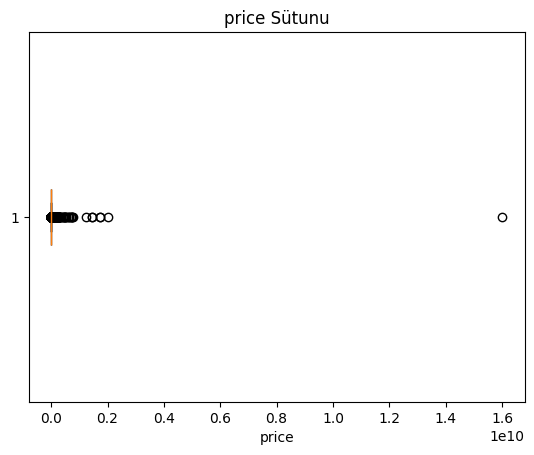

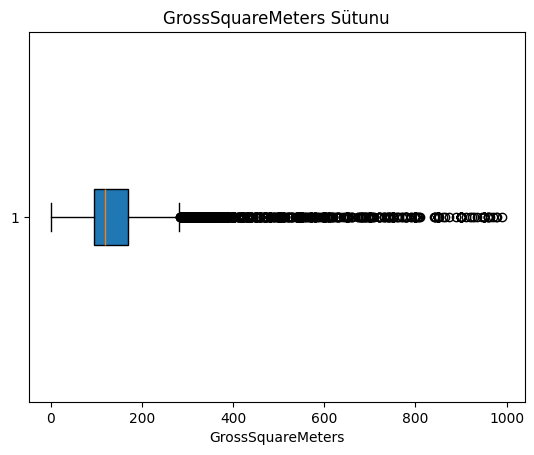

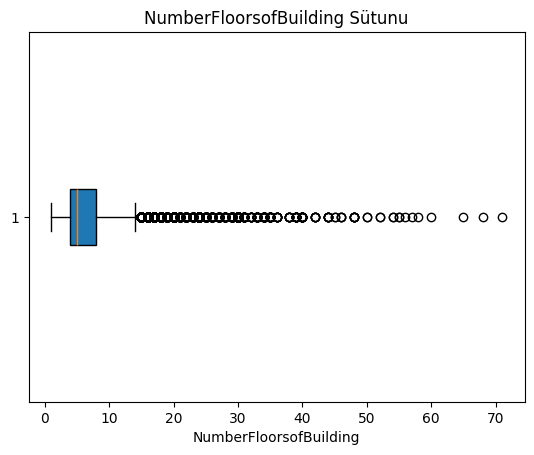

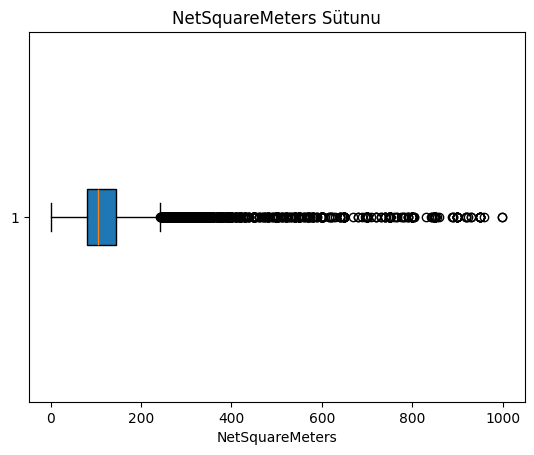

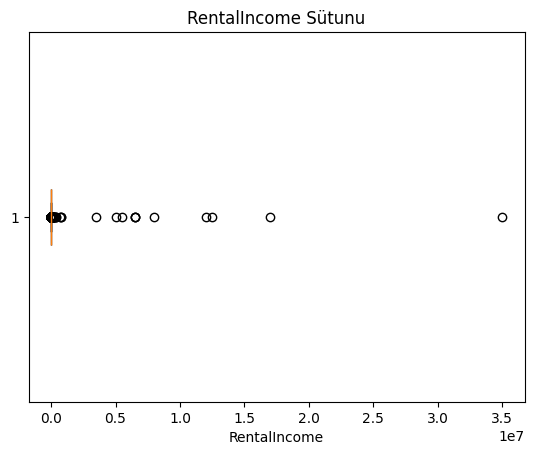

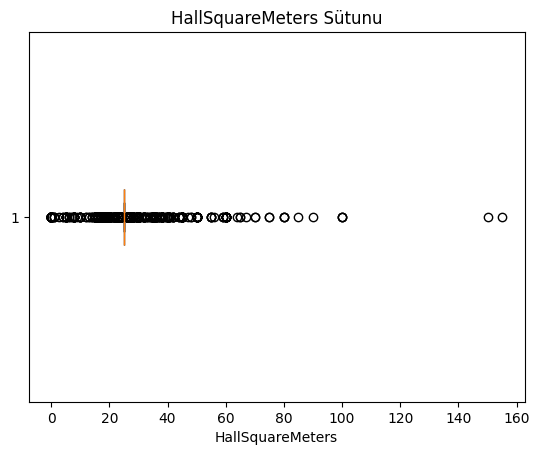

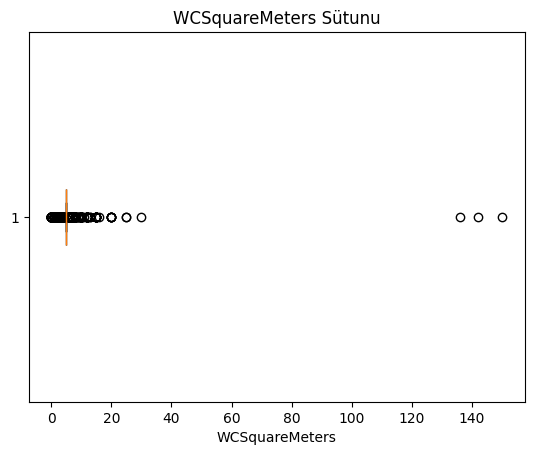

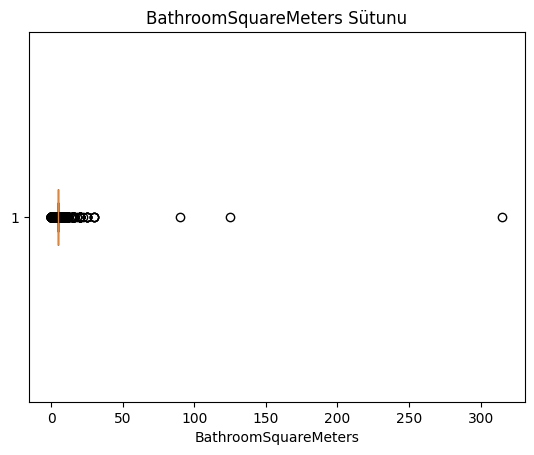

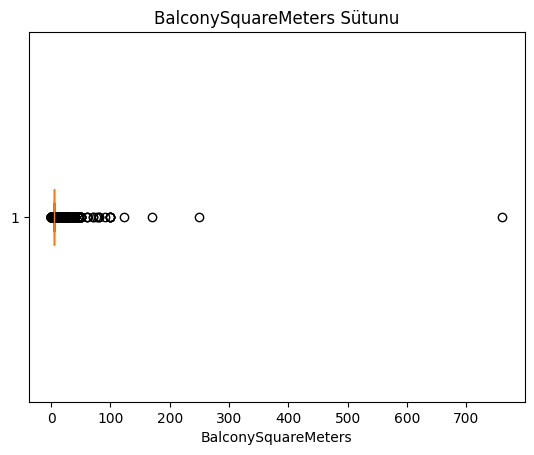

In [32]:
# AykÄ±rÄ± deÄŸerlerin gÃ¶rselleÅŸtirilmesi
for col in numeric_columns:
  plt.boxplot(df[col], vert=False, patch_artist=True)
  plt.title(f'{col} SÃ¼tunu')
  plt.xlabel(col)
  plt.show()

**AykÄ±rÄ± deÄŸer analizi yapmalÄ± mÄ±yÄ±m?**

GÃ¶rÃ¼ldÃ¼ÄŸÃ¼ Ã¼zere her sayÄ±sal sÃ¼tunumuz iÃ§in aykÄ±rÄ± deÄŸerler mevcut, normal ÅŸartlarda bu tarz durumlarda aykÄ±rÄ± deÄŸerlerin bastÄ±rÄ±lmasÄ±(sÄ±nÄ±ra Ã§ekilmesi) gerekir fakat hedef deÄŸiÅŸkenimiz fiyat olduÄŸu iÃ§in bÃ¶yle bir durumda fiyata ve fiyata etki derecesi yÃ¼ksek olan sÃ¼tunlara mÃ¼dahale etmek doÄŸru olmayacaktÄ±r.

# ENCODE Ä°ÅžLEMLERÄ°

In [33]:
df.select_dtypes(include=['object']).columns

Index(['district', 'Category', 'BuildingAge', 'UsingStatus', 'BuildStatus',
       'TitleStatus', 'ItemStatus', 'NumberOfBathrooms', 'NumberOfWCs', 'Type',
       'NumberOfRooms', 'FloorLocation', 'HeatingType', 'CreditEligibility',
       'InsideTheSite', 'StructureType', 'MortgageStatus', 'Balcony',
       'NumberOfBalconies', 'BalconyType'],
      dtype='object')

In [34]:
df.head()

district       price Category  GrossSquareMeters  BuildingAge  \
0   adalar   3100000.0  SatÄ±lÄ±k              160.0  21 Ve Ãœzeri   
1   adalar   1600000.0  SatÄ±lÄ±k              120.0         5-10   
2   adalar  18500000.0  SatÄ±lÄ±k              350.0  21 Ve Ãœzeri   
3   adalar   9500000.0  SatÄ±lÄ±k              550.0        11-15   
4   adalar  25000000.0  SatÄ±lÄ±k              840.0  21 Ve Ãœzeri   

   NumberFloorsofBuilding           UsingStatus BuildStatus    TitleStatus  \
0                       3  MÃ¼lk Sahibi Oturuyor   Ä°kinci El  Kat MÃ¼lkiyeti   
1                       3  MÃ¼lk Sahibi Oturuyor   Ä°kinci El  Kat MÃ¼lkiyeti   
2                       2  MÃ¼lk Sahibi Oturuyor   Ä°kinci El  Kat MÃ¼lkiyeti   
3                       3  MÃ¼lk Sahibi Oturuyor   Ä°kinci El  Kat MÃ¼lkiyeti   
4                       4                   BoÅŸ   Ä°kinci El  Kat MÃ¼lkiyeti   

  ItemStatus  ... StructureType MortgageStatus Balcony  RentalIncome  \
0     EÅŸyalÄ±  ...     Betonarme            Yok     Var          3000   
1     EÅŸyalÄ±  ...     Betonarme            Yok     Var          3000   
2        BoÅŸ  ...     Betonarme            Yok     Var          3000   
3        BoÅŸ  ...     Betonarme            Yok     Var          3000   
4        BoÅŸ  ...         AhÅŸap            Yok     Var          3000   

  NumberOfBalconies  BalconyType HallSquareMeters WCSquareMeters  \
0                 1  AÃ§Ä±k Balkon             25.0            5.0   
1                 1  AÃ§Ä±k Balkon             25.0            5.0   
2                 1  AÃ§Ä±k Balkon             25.0            5.0   
3                 1  AÃ§Ä±k Balkon             25.0            5.0   
4                 1  AÃ§Ä±k Balkon             25.0            5.0   

  BathroomSquareMeters BalconySquareMeters  
0                  5.0                 5.0  
1                  5.0                 5.0  
2                  5.0                 5.0  
3                  5.0                 5.0  
4                  5.0                 5.0  

[5 rows x 29 columns]

In [35]:
df['BuildingAge_numeric'] = df['BuildingAge_numeric'].astype(int)
df['NumberOfBathrooms_numeric'] = pd.to_numeric(df['NumberOfBathrooms_numeric'])
df['NumberOfWCs_numeric'] = pd.to_numeric(df['NumberOfWCs_numeric'])
df['NumberOfBalconies_numeric'] = pd.to_numeric(df['NumberOfBalconies_numeric'])

KeyError: 'BuildingAge_numeric'

In [36]:
df['BuildingAge'].unique()

array(['21 Ve Ãœzeri', '5-10', '11-15', '2', '0 (Yeni)', '3', '4', '16-20',
       '1', '20 Ve Ãœzeri'], dtype=object)

In [37]:
# BuildingAge deÄŸiÅŸkenini sayÄ±sala dÃ¶ndÃ¼rme iÅŸlemi
building_age_map = {
    '0 (Yeni)': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5-10': 7.5,
    '11-15': 13,
    '16-20': 18,
    '20 Ve Ãœzeri': 21,
    '21 Ve Ãœzeri': 21
}

df['BuildingAge_numeric'] = df['BuildingAge'].map(building_age_map)

- Burada direkt olarak sayÄ±sal iÃ§erenler sayÄ±sal olarak iÅŸaretlendi (0=0, 1=1)
- AralÄ±k olanlar ortalama olarak iÅŸaretlendi (5-10 = 7.5)
- 20 ve Ã¼zeri , 21 ve Ã¼zeri ise 21 olarak iÅŸaretlendi

In [38]:
df['BuildingAge_numeric'].dtype

dtype('float64')

In [39]:
# BuildingAge deÄŸiÅŸkeni artÄ±k silinebilir
df.drop('BuildingAge', axis=1, inplace=True)

In [40]:
# NumberOfBathrooms
df['NumberOfBathrooms'].unique()

array(['2', '1', '3', '4', '5', 'Yok', '6+'], dtype=object)

In [41]:
NumberOfBathrooms_map = {
    '2': 2,
    '1': 1,
    '3': 3,
    '4': 4,
    '5': 5,
    'Yok':0,
    '6+':6
}
df['NumberOfBathrooms_numeric'] = df['NumberOfBathrooms'].map(NumberOfBathrooms_map)

In [42]:
df['NumberOfBathrooms_numeric'].unique()

array([2, 1, 3, 4, 5, 0, 6])

In [43]:
df.drop('NumberOfBathrooms', axis=1, inplace=True)

In [44]:
# NumberOfWCs
df['NumberOfWCs'].unique()

array(['1', '2', '4', '3', 'Yok', '5', '6+'], dtype=object)

In [45]:
NumberOfWCs_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    'Yok':0,
    '5':5,
    '6+':6
}
df['NumberOfWCs_numeric'] = df['NumberOfWCs'].map(NumberOfWCs_map)

In [46]:
df['NumberOfWCs_numeric'].unique()

array([1, 2, 4, 3, 0, 5, 6])

In [47]:
df.drop('NumberOfWCs', axis=1, inplace=True)

In [48]:
# NumberOfBalconies
df['NumberOfBalconies'].unique()

array(['1', '4 +', '3', '2'], dtype=object)

In [49]:
NumberOfBalconies_map = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4 +': 4
}
df['NumberOfBalconies_numeric'] = df['NumberOfBalconies'].map(NumberOfWCs_map)

In [50]:
df['NumberOfBalconies_numeric'].unique()

array([ 1., nan,  3.,  2.])

In [51]:
df['NumberOfBalconies_numeric'].isnull().sum()

np.int64(81)

In [52]:
df['NumberOfBalconies_numeric'] = df['NumberOfBalconies_numeric'].fillna(df['NumberOfBalconies_numeric'].mode()[0])

In [53]:
df.drop('NumberOfBalconies', axis=1, inplace=True)

In [54]:
# Label Encoding
df.select_dtypes(include=['object']).columns,
label_cols = ['CreditEligibility', 'InsideTheSite', 'MortgageStatus', 'Balcony', 'district']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# One-Hot Encoding
one_hot_cols = ['Category', 'UsingStatus', 'BuildStatus', 'TitleStatus',
                'ItemStatus', 'Type', 'HeatingType', 'StructureType', 'BalconyType',]

df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


**Modelin eÄŸitilmesi ve decisiontrees uygulanmasÄ±**

In [55]:
target = 'price'
X = df.drop(columns=[target])  # BaÄŸÄ±msÄ±z deÄŸiÅŸkenler
y = df[target] # Hedef deÄŸiÅŸken

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin oluÅŸturulmasÄ±
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# 5. Tahmin ve metrikler
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RÂ² Score: {r2:.2f}")


MSE: 155024453899253376.00
RÂ² Score: -163.03


deÄŸerler oldukÃ§a kÃ¶tÃ¼ durumda

In [67]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [68]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Performans metrikleri
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# SonuÃ§lar
print("GridSearch best params:")
print(grid_search.best_params_)
print(f"ðŸ“‰ MSE: {mse:.2f}")
print(f"ðŸ“ˆ RÂ²: {r2:.2f}")


GridSearch best params:
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
ðŸ“‰ MSE: 1108014431694471.50
ðŸ“ˆ RÂ²: -0.17


Modelimizin baÅŸarÄ±sÄ± artmÄ±ÅŸ gÃ¶zÃ¼kÃ¼yor fakat hala istediÄŸimizden Ã§ok uzakta

Ã–zellik mÃ¼hendisliÄŸi kapsamÄ±nda iÅŸimize yaramayacak olan sÃ¼tunlarÄ± (address gibi) Ã¶nceki hÃ¼crelerde silmiÅŸtik.

In [69]:
# Logaritmik dÃ¶nÃ¼ÅŸÃ¼m
df['price_log'] = np.log1p(df['price'])

In [70]:
# KarekÃ¶k dÃ¶nÃ¼ÅŸÃ¼mÃ¼
df['NetSquareMeters_sqrt'] = np.sqrt(df['NetSquareMeters'])
df['GrossSquareMeters_sqrt'] = np.sqrt(df['GrossSquareMeters'])

# XGBOOST ve RANDOMFOREST UYGULANMASI

In [73]:
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42, n_estimators=100, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)



mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Random Forest - MSE: {mse_rf:.4f}, RÂ²: {r2_rf:.4f}")
print(f"XGBoost        - MSE: {mse_xgb:.4f}, RÂ²: {r2_xgb:.4f}")


Random Forest - MSE: 20061952401928936.0000, RÂ²: -20.2268
XGBoost        - MSE: 20712767406017152.0000, RÂ²: -20.9154


Model hiÃ§bir tÃ¼rlÃ¼ istediÄŸim baÅŸarÄ±yÄ± gÃ¶stermedi deÄŸerler hala Ã§ok kÃ¶tÃ¼ bu adÄ±mdan sonra ne yapacaÄŸÄ±mÄ± bilmiyorum.